<a href="https://colab.research.google.com/github/wlwlsus/EMG-Machine-Learning/blob/main/SampleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from google.colab import drive
import pandas as pd

import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
base_url = '/gdrive/MyDrive/Deu EMG Machine Learning/data'
os.chdir(base_url)

In [ ]:
os.chdir(base_url)
data_list = []


# plt.figure(figsize=(80,80))
# for i in range(1,5+1):
#     plt.subplot(5,5,i)
#     train_loc = './'+str(i)+'.csv'
#     trains = np.loadtxt(train_loc, delimiter=',', dtype=float)
#     train_datas = trains[10:-1]
#     plt.title('EMG Signal',fontdict= font)
#     plt.xlabel("Time",fontdict=font)
#     plt.ylabel("EMG Amplitude",fontdict=font)
#     plt.plot(train_datas)

In [ ]:

train_loc = "./example_train.csv"
test_loc = "./example_test.csv"

trains = np.loadtxt(train_loc, delimiter=',', dtype=float)
train_datas = trains[:,:-1]
train_labels = trains[:,-1].reshape([len(trains),1])

tests = np.loadtxt(test_loc, delimiter=',', dtype=float)
test_datas = tests[:,:-1]
test_labels = tests[:,-1].reshape([len(tests),1])

print(train_datas.shape)
print(train_labels.shape)

print(test_datas.shape)
print(test_labels.shape)

(200, 629)
(200, 1)
(30, 629)
(30, 1)


In [ ]:
train_datas

array([[ 47.11702812,  47.1395368 ,  47.2064135 , ...,  48.08072538,
         48.07497223,  48.06866963],
       [ 46.98800362,  47.00849637,  47.06938599, ...,  47.64844578,
         47.65887362,  47.66892298],
       [ 46.75808464,  46.78246752,  46.85490983, ...,  47.49494497,
         47.47520062,  47.45536621],
       ...,
       [124.21711792, 123.64340625, 123.03013173, ...,  44.64864423,
         44.63103089,  44.61390282],
       [119.95516972, 119.41346756, 118.82944334, ...,  44.90910159,
         44.91177903,  44.91501345],
       [123.0149185 , 122.45132729, 121.8484668 , ...,  44.8332053 ,
         44.81699116,  44.80129367]])

In [ ]:
# 모델 생성 메소드
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(len(train_labels), activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

model = create_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               80640     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               25800     
Total params: 106,440
Trainable params: 106,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 훈련단계
model.fit(train_datas, train_labels, epochs=100)

In [ ]:
# 정확도 평가 단계
test_loss, test_acc = model.evaluate(test_datas,  test_labels, verbose=2)
print('\ntest accuracy:', test_acc)

1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000

test accuracy: 1.0


In [ ]:
predictions = model.predict(test_datas)

predict_data = test_datas[10]
predict_data2 = test_datas[20]

predict_data = (np.expand_dims(predict_data,0))
predict_data2 = (np.expand_dims(predict_data2,0))


pr = model.predict(predict_data)
pr2 = model.predict(predict_data2)

print(f'테스트 데이터 의 결과 값 : {np.argmax(pr[0])}')
print(f'테스트 데이터 의 결과 값 : {np.argmax(pr2[0])}')

테스트 데이터 의 결과 값 : 1
테스트 데이터 의 결과 값 : 0


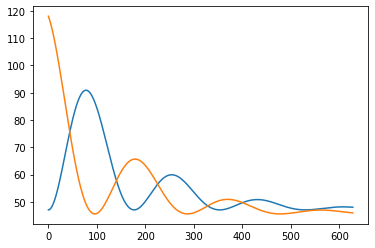

In [ ]:
plt.plot(test_datas[10])
plt.plot(test_datas[20])